# Stutern Data Science Beginner Phase Final Project: IBM Employee Attribution Analysis

## Submitted by Ifeoluwa Oduwaiye

## Data Extraction

In [2]:
# Import modules

import pandas as pd
import numpy as np
import sqlite3

In [3]:
# Create connection to database
conn = sqlite3.connect('attr_data.db')

# Convert query result to database
df = pd.read_sql("SELECT * FROM attrition_records", con=conn)

In [4]:
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [6]:
df.isnull().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

The dataset has no missing columns

## Data Analysis

During my analysis, I would be answering the following questions:

1. What do you think are the 3 factors behind employee attrition?
2. What is the relationship between Education and Monthly Income?
3. What is the effect of age on attrition?
4. Is Income the main factor in employee attrition?
5. How does work-life balance impact the overall attrition rate?

In [7]:
# Import visualization modules

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1: What do you think are the 3 factors behind employee attrition?

The factors behind attrition should be the factors that have a highest correlation with attrition. I will now proceed to find the various correlations each column has with attrition.

In [8]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
# Map the attrition values above to 1 and 0

df['mapped_attr'] = np.where(df['Attrition'] == 'No', 0, 1)

In [10]:
corr = df.corr()

corr.head()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,mapped_attr
id,1.000000,-0.010349,-0.051484,0.032928,0.041901,NaN,0.999906,0.017424,0.034754,-0.007105,...,NaN,0.062452,-0.014095,0.023907,0.010740,-0.011557,-0.008853,-0.009151,-0.009432,-0.010369
Age,-0.010349,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,-0.051484,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,0.032928,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.041901,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373


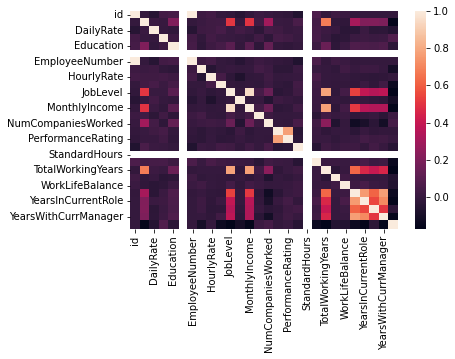

In [11]:
sns.heatmap(df.corr())

The heatmap seems to be populated. I will now try to statistically determine the columns that have the highest correlation with attrition.

In [12]:
# Create correlation matrix
correlations = corr.unstack().sort_values(ascending=False)

# Convert matrix to dataframe
correlations = pd.DataFrame(correlations).reset_index()

# Label the columns
correlations.columns = ['col1', 'col2', 'correlation']

# Print attrition correlation ordered by absolute correlation
correlations.query("col1 == 'mapped_attr' & col2 != 'mapped_attr'").sort_values(by='correlation', ascending=False, key=abs).head(3)

,col1,col2,correlation
674,mapped_attr,TotalWorkingYears,-0.171063
673,mapped_attr,JobLevel,-0.169105
671,mapped_attr,YearsInCurrentRole,-0.160545


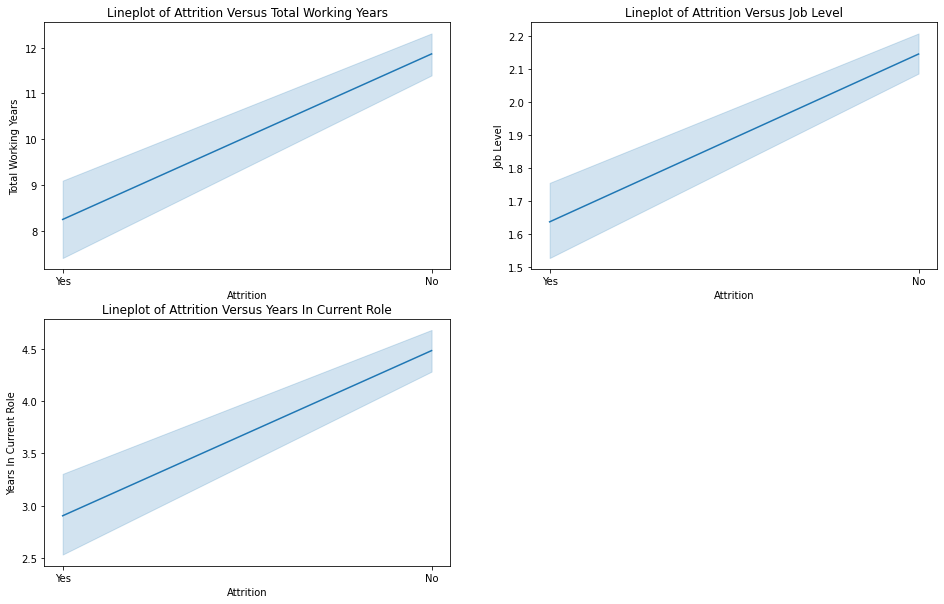

In [13]:
plt.figure(figsize=(16, 10))

plt.subplot(2,2,1)
plt.title("Lineplot of Attrition Versus Total Working Years")
plt.ylabel("Total Working Years")
sns.lineplot(x='Attrition', y='TotalWorkingYears', data=df)

plt.subplot(2,2,2)
plt.title("Lineplot of Attrition Versus Job Level")
plt.ylabel("Job Level")
sns.lineplot(x='Attrition', y='JobLevel', data=df)

plt.subplot(2,2,3)
plt.title("Lineplot of Attrition Versus Years In Current Role")
plt.ylabel("Years In Current Role")
sns.lineplot(x='Attrition', y='YearsInCurrentRole', data=df)

Answer 1:

The top 3 factors(columns) behind employee attrition are:
1. Total Working Years
2. Job Level
3. Years In Current Role
</br>
<i> According to absolute correlation analysis</i>

### Question 2: What is the relationship between Education and Monthly Income?

In [14]:
df.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [15]:
df[["Education", "MonthlyIncome"]].corr()

,Education,MonthlyIncome
Education,1.000000,0.094961
MonthlyIncome,0.094961,1.000000


In [16]:
# Map Education using the education dictionary

df['mapped_edu'] = np.where(df["Education"]==1, "Below College", np.where(df["Education"]==2, "College", np.where(df["Education"]==3, "Bachelor", np.where(df["Education"]==4, "Master", "Doctor"))))

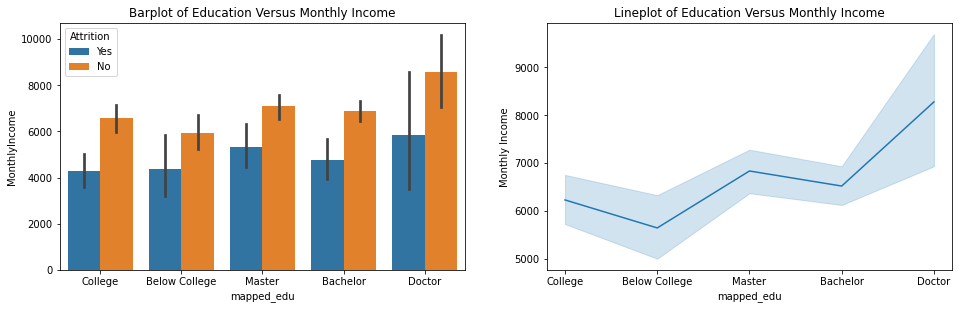

In [34]:
plt.figure(figsize=(16, 10))

plt.subplot(2,2,1)
plt.title("Barplot of Education Versus Monthly Income")
plt.ylabel("Monthly Income")
sns.barplot(x='mapped_edu', y='MonthlyIncome', data=df, hue='Attrition')

plt.subplot(2,2,2)
plt.title("Lineplot of Education Versus Monthly Income")
plt.ylabel("Monthly Income")
sns.lineplot(x='mapped_edu', y='MonthlyIncome', data=df)

Answer 2:

There is a slight positive relationship between Education and Monthly Income.

As shown in the graphs above, monthly income increases as the education level increases.
This order is shown below as:
1. Below College
2. College
3. Bachelor
4. Master
5. Doctor

The salary for doctorate holders is shown to be significantly higher than all the others.

Also, the correlation between education and monthly income is 9.49%.

### Question 3: What is the effect of age on attrition?

In [ ]:
df[["Age", "mapped_attr"]].corr()

,Age,mapped_attr
Age,1.000000,-0.159205
mapped_attr,-0.159205,1.000000


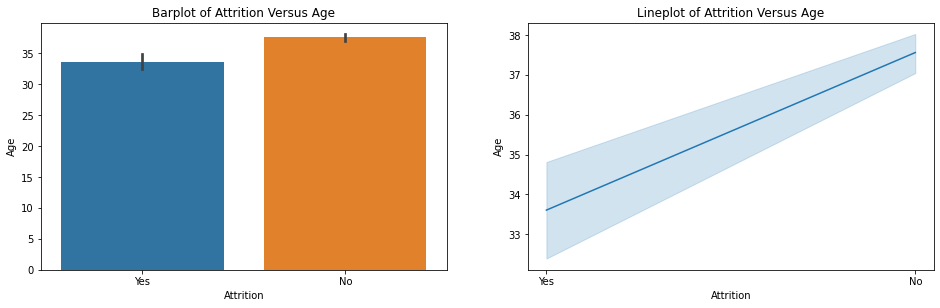

In [ ]:
plt.figure(figsize=(16, 10))

plt.subplot(2,2,1)
plt.title("Barplot of Attrition Versus Age")
sns.barplot(x='Attrition', y='Age', data=df)

plt.subplot(2,2,2)
plt.title("Lineplot of Attrition Versus Age")
sns.lineplot(x='Attrition', y='Age', data=df)

Answer:

As the age of the employee increase, the attrition reduces. Hence, there is an inverse or negative relationship between age and attrition. This correlation is given as -15.92%.

### Question 4: Is Income the main factor in employee attrition?

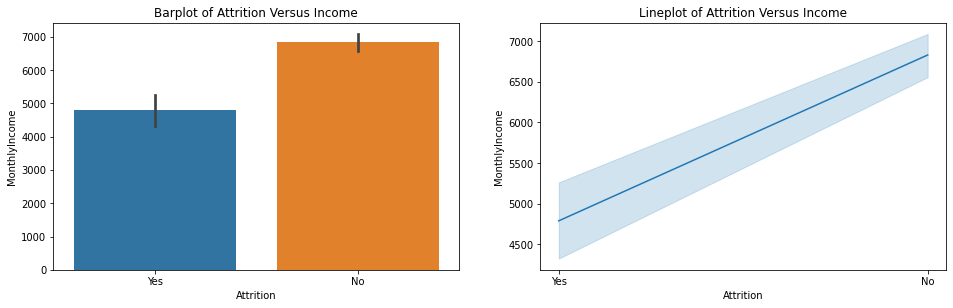

In [ ]:
plt.figure(figsize=(16, 10))

plt.subplot(2,2,1)
plt.title("Barplot of Attrition Versus Income")
sns.barplot(x='Attrition', y='MonthlyIncome', data=df)

plt.subplot(2,2,2)
plt.title("Lineplot of Attrition Versus Income")
sns.lineplot(x='Attrition', y='MonthlyIncome', data=df)

In [ ]:
# Create correlation matrix
correlations = corr.unstack().sort_values(ascending=False)

# Convert matrix to dataframe
correlations = pd.DataFrame(correlations).reset_index()

# Label the columns
correlations.columns = ['col1', 'col2', 'correlation']

# Print attribution correlation ordered by absolute correlation
correlations.query("col1 == 'mapped_attr' & col2 != 'mapped_attr'").sort_values(by='correlation', ascending=False, key=abs).head()

,col1,col2,correlation
674,mapped_attr,TotalWorkingYears,-0.171063
673,mapped_attr,JobLevel,-0.169105
671,mapped_attr,YearsInCurrentRole,-0.160545
668,mapped_attr,MonthlyIncome,-0.159840
667,mapped_attr,Age,-0.159205


Answer 4:

Income is among the top 4 factors affecting employee attrition. So I can safely conlude that income is one of the main factors in customer attrition. </br>
But income is not the main factor. The main factor is Total Working Years since it has the highest absolute correlation with employee attrition.

### Question 5: How does work-life balance impact the overall attrition rate?

In [ ]:
df.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [ ]:
df[['mapped_attr', 'WorkLifeBalance']].corr()

,mapped_attr,WorkLifeBalance
mapped_attr,1.000000,-0.063939
WorkLifeBalance,-0.063939,1.000000


In [18]:
# Map Work Life Balance using the mapping dictionary

df['mapped_wlb'] = np.where(df["WorkLifeBalance"]==1, "Bad", np.where(df["WorkLifeBalance"]==2, "Good", np.where(df["WorkLifeBalance"]==3, "Better", "Best")))

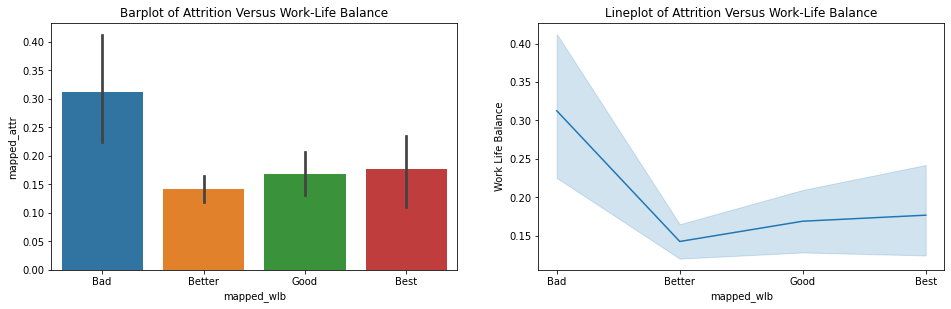

In [23]:
plt.figure(figsize=(16, 10))

plt.subplot(2,2,1)
plt.title("Barplot of Attrition Versus Work-Life Balance")
plt.ylabel("Work Life Balance")
sns.barplot(y='mapped_attr', x='mapped_wlb', data=df)

plt.subplot(2,2,2)
plt.title("Lineplot of Attrition Versus Work-Life Balance")
plt.ylabel("Work Life Balance")
sns.lineplot(x='mapped_wlb', y='mapped_attr', data=df)

Answer 5: 

As shown above, the highest number of employee attrition occurs when the work life balance of the employee is bad. Hence, we can safely conclude that the attrition rate is high when the employee work life balance is high and minimal when the work life balance is better.

## Other Analysis

Now, I would like to check how these factors affect employee attrition rate.
1. Number of Companies Worked
2. Job Level
3. Hourly Rate

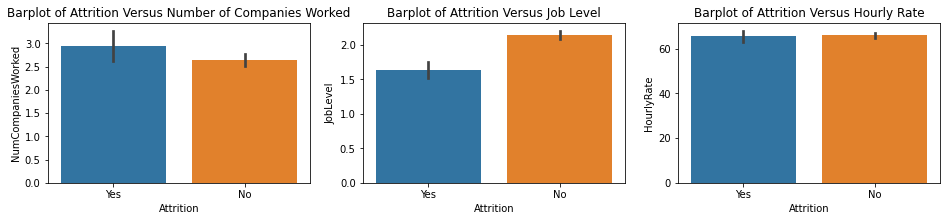

In [32]:
plt.figure(figsize=(16, 10))

plt.subplot(3,3,1)
plt.title("Barplot of Attrition Versus Number of Companies Worked")
plt.ylabel("Number of Companies Worked")
sns.barplot(x='Attrition', y='NumCompaniesWorked', data=df)

plt.subplot(3,3,2)
plt.title("Barplot of Attrition Versus Job Level")
plt.ylabel("Job Level")
sns.barplot(x='Attrition', y='JobLevel', data=df)

plt.subplot(3,3,3)
plt.title("Barplot of Attrition Versus Hourly Rate")
plt.ylabel("Hourly Rate")
sns.barplot(x='Attrition', y='HourlyRate', data=df)

From the plots above, I gained the following insights
1. The higher the number of companies an employee has worked in, the higher the tendency of the employee to leave(employee attrition rate).
2. The higher the job level of an employee, the lower the tendency of that employee to leave(employee attrition rate). This means that younger employees generally don't spend a lot of time in companies.
3. The hourly rate of an employee has no significant effect on the employee attrition rate.